# Imports

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definitions

In [2]:
def k_nn(dataset, label, title="K-Near Neighbor", yLabel=None, Class='class'):
    """
    Perform K-NN on the given dataset with a target and the given label for data.
    
    @param DataFrame dataset: dataframe of the data to perform K-NN on.
    @param str target: what column is the target variable in the dataset.
    @param str label: what column is the label in the dataset.
    """
    a = dataset[dataset != 'anomaly'].dropna().drop([Class], axis=1)
    n = dataset[dataset != 'normal'].dropna().drop([Class, label], axis=1)
    df = dataset[dataset!=0].dropna().drop([label, Class], axis=1)               # get dataset without label
    
    knn = KNeighborsClassifier(n_neighbors = 3)
#     xTrain, xTest, yTrain, yTest = train_test_split(df, dataset[label], test_size = 0.3, random_state=42)
    knn.fit(a.drop([label],axis=1), a[label])
    yPred = knn.predict(df)
    
    labels, counts = np.unique(yPred, return_counts=True)
    percents = []
    _sum = sum(counts)
    for i in counts:            
        percents.append(i/_sum)
        
    
    %matplotlib inline
    plt.rcParams.update({'font.size': 20})
    plt.pie(percents, labels=labels, autopct='%1.1f%%')
    plt.title(title)
    plt.show()

In [3]:
def plot_all(dataset, X, title="Scatter Plot", xLabel=None, yLabel=None):
    df = dataset.drop([X], axis=1)
    dataset = dataset[dataset != 0].dropna()
    
    a = dataset[dataset != 'normal'].dropna()
    n = dataset[dataset != 'anomaly'].dropna()

    #%matplotlib inline
    for i in df.columns:
        plt.rcParams.update({'font.size': 16})
        plt.plot(n.index.values.tolist(), n[i], '-o')
        plt.plot(a.index.values.tolist(), a[i], '-x')
        plt.xlabel("KDD Dataset Row Number" if xLabel==None else xLabel)
        plt.ylabel(i if yLabel==None else yLabel)
        
        plt.legend(np.flip(np.unique(dataset[X])))
        plt.title(title)
    plt.show()

# NSL-KDD Dataset

<u><strong>Load NSL-KDD dataset<strong></u>

In [4]:
kddFile = arff.loadarff('KDDTrain+.arff')
kddDF = pd.DataFrame(kddFile[0])
for i in kddDF.columns:
    if type(kddDF[i][0]) == bytes:
        kddDF[i] = kddDF[i].str.decode('utf-8')
kddDF.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
kddDF.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.001342,0.001103,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,0.036603,0.045154,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
kddDF.shape

(125973, 42)

<u><strong>Performing K-mean<strong></u>

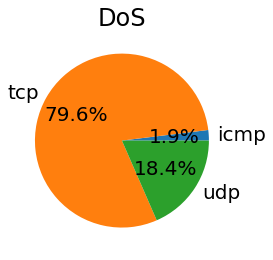

In [8]:
k_nn(kddDF[['src_bytes','count', 'protocol_type', 'class']], "protocol_type", "DoS")

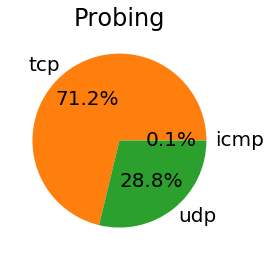

In [9]:
k_nn(kddDF[["duration","src_bytes", 'protocol_type', 'class']], "protocol_type", "Probing")

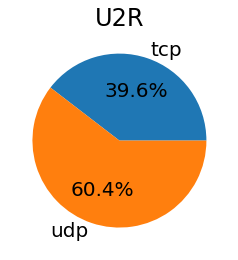

In [10]:
k_nn(kddDF[['logged_in', 'is_host_login', 'protocol_type', 'class']], "protocol_type", "U2R")

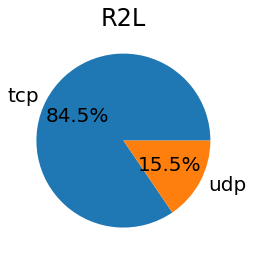

In [11]:
k_nn(kddDF[['duration', 'num_failed_logins', 'protocol_type', 'class']], "protocol_type", "R2L")

In [12]:
kddDF[['logged_in', 'root_shell', 'num_root', 'class']][(kddDF['logged_in']!="0")&(kddDF['num_root']!=0)&(kddDF['class']!='normal')].dropna()

,logged_in,root_shell,num_root,class
3005,1,1.0,54.0,anomaly
3173,1,1.0,14.0,anomaly
11448,1,0.0,7.0,anomaly
25095,1,0.0,4.0,anomaly
36730,1,0.0,1.0,anomaly
37270,1,1.0,4.0,anomaly
47343,1,0.0,1.0,anomaly
59000,1,0.0,1.0,anomaly
66007,1,1.0,2.0,anomaly
69147,1,1.0,2.0,anomaly


<u><strong>Swarm Plot</strong></u>

In [13]:
# for i in kddDF.columns:
#     plot_all(kddDF[[i, 'class']][:], "class", i)

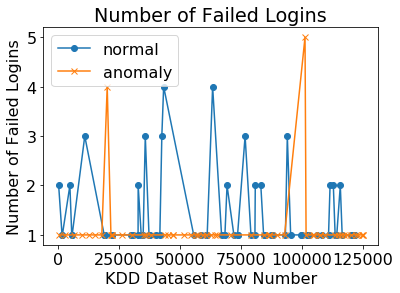

In [14]:
plot_all(kddDF[['num_failed_logins','class']], "class", "Number of Failed Logins", yLabel="Number of Failed Logins")

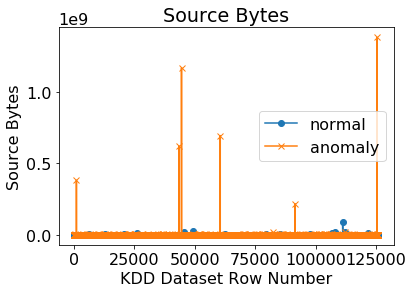

In [15]:
plot_all(kddDF[['src_bytes','class']], "class", "Source Bytes", yLabel="Source Bytes")

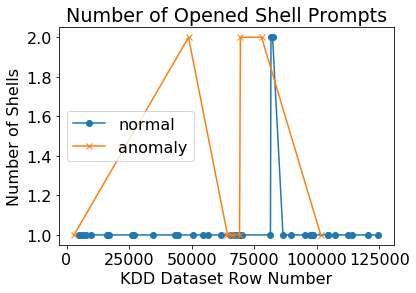

In [16]:
plot_all(kddDF[['num_shells','class']], "class", "Number of Opened Shell Prompts", yLabel="Number of Shells")

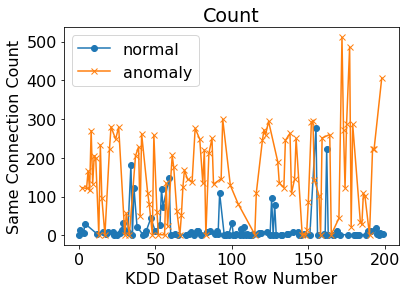

In [17]:
plot_all(kddDF[['count','class']][:200], "class", "Count", yLabel="Same Connection Count")

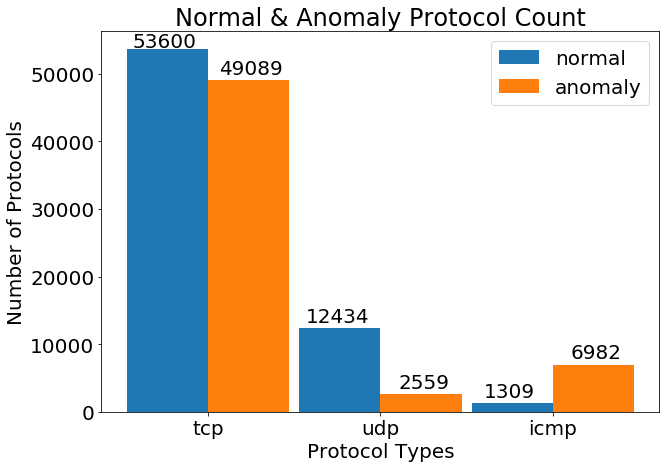

array([0.2, 1.2, 2.2])

In [18]:
apt = kddDF[kddDF!='normal'].dropna()
npt = kddDF[kddDF!='anomaly'].dropna()
apc = [0,0,0]
npc = [0,0,0]
for i in apt['protocol_type']:
    if i == 'tcp':
        apc[0]+=1
    elif i == 'udp':
        apc[1]+=1
    elif i == 'icmp':
        apc[2]+=1
for i in npt['protocol_type']:
    if i == 'tcp':
        npc[0]+=1
    elif i == 'udp':
        npc[1]+=1
    elif i == 'icmp':
        npc[2]+=1
x=np.arange(3)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,7))
plt.bar(x-0.235, npc, width=0.47, align="center", label="normal")
plt.bar(x+0.235, apc, width=0.47, align="center", label="anomaly")
plt.xticks(x, ('tcp', 'udp', 'icmp'))

plt.xlabel("Protocol Types")
plt.ylabel("Number of Protocols")
plt.title("Normal & Anomaly Protocol Count")

plt.text(x[0]+0.25,apc[0]+900,s=apc[0],horizontalalignment="center")
plt.text(x[1]+0.25,apc[1]+1000,s=apc[1],horizontalalignment="center")
plt.text(x[2]+0.25,apc[2]+1000,s=apc[2],horizontalalignment="center")

plt.text(x[0]-0.25,npc[0]+400,s=npc[0],horizontalalignment="center")
plt.text(x[1]-0.25,npc[1]+900,s=npc[1],horizontalalignment="center")
plt.text(x[2]-0.25,npc[2]+900,s=npc[2],horizontalalignment="center")


plt.legend()
plt.show()
x+0.2